<a href="https://www.kaggle.com/jagadish13/wisconsin-breast-cancer-classification-using-knn?scriptVersionId=90012851" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**(Q)** Investigate a particular method for supervised learning. This could either be a method for regression or classification but should be a method with at least one tunable hyperparameter. You could choose one from ridge regression, k-nearest neighbour regression, a regression tree, regularized logistic regression, k-nearest neighbour classification, a decision tree, a random forest or another supervised learning technique you find interesting.

#### 1. **Description**

**(A)** I chose a **K-Nearest Neighbour classifier** using **python** for this task. This report demonstrates my approach for a supervised learning task in classifying *Breast Cancer*, predicting whether the cancer is benign or malignant from the **Wisconsin Breast Cancer dataset**.

#### **1.1 About the Dataset**
- Wisconsin Breast Cancer dataset from the UCI Machine Learning Repository is a classification dataset containing records of breast cancer measurements.
  
- The dataset contains two classes, **benign** and **malignant**.

| Characteristics | Attributes | No. of Instances | No. of Attributes |
| --- | --- | --- | --- |
| Multivariate | Real | 569 | 32 |

- The size of the dataset is `127kb`.

[More about the dataset: UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

#### **1.2 K-Nearest Neighbours Algorithm**

**What is K-NN?**

K-Nearest Neighbor (K-NN) is a classic example of a supervised machine learning algorithm for regression and classification tasks.

K-NN uses the provided data and classifies new data points based on the `similarity measures` (such as EUCIidean or Manhattan distance) between the new data point and the data points in the training set.

Unlike the traditional supervised learning approach `KNN is unique with the two properties`:
- Lazy Learning
  
- Non-parametric method

**a. Lazy Learning**

K-NN is a lazy learning algorithm because it doesn't learn the discriminative function from the supplied training data. Instead, it `memorizes` the training data and then uses it to predict the output. The generalization of the training data is delayed until a query is made.

**b. Non-parametric Method**

The `model parameters actually grow with the training set`. We will need to keep all the training data for prediction later.

This is unlike a parametric classifier(such as decision trees, linear, logistic regression) where, after finding the optimal parameters, we can use it for prediction.


---

**Working and Predictions by K-NN**

* K-NN works by finding the distance between a query and all the training data points and `votes for the most frequent label`.
* The distance is calculated using the `similarity measures` (such as EUCIidean or Manhattan distance), classifies new data points based on similarity.

**Types of problem KNN is used?**

* K-NN can be used to solve *classification and regression problems*
* Used for *non-linear data* (non-linear relation between dependent and independent variables)
* Quick *ad-hoc analysis* on data, simple tunable parameter
* *Outlier detection* on large datasets




## **1. Importing Required Libraries**

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Statistical Analysis
import scipy.stats as stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Import the dataset**
Kindly check the directory path where the dataset is stored and change accordingly.

In [2]:
# Breast Cancer Wisconsin (Diagnostic) Data Set
breast_cancer_data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

breast_cancer_data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


## **2. Data Exploration**

**How many features are there?**

In [3]:
# Features in the dataset
print("Features in the dataset: \n{cols} \n\n Number of features in the dataset is {num_features}" 
.format(cols = list(breast_cancer_data.columns), num_features = len(breast_cancer_data.columns)))

Features in the dataset: 
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'] 

 Number of features in the dataset is 33


**Description of the dataset**

Tabulation of descriptive statistics for the Wisconsin Breast Cancer dataset.

In [4]:
# Dataset Description
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**DataFrame Information**
Information about a DataFrame including the index dtype and columns, non-null values.

**What type are each of the variables (eg. Categorical, ordinal, continuous, binary etc.?)**

In [5]:
# Information about the dataframe
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

From the above description, we can see that *most of the features in the dataset* is of type `float64` whereas, the id is of type `int64` and diagnosis is `object` datatype.

In [6]:
breast_cancer_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

The `diagnosis` column is a `categorical` type as it contains the values `B` - Benign and `M` - Malignant.

In [7]:
df_A = breast_cancer_data[['id','diagnosis','Unnamed: 32']]

df_A.head(3)

,id,diagnosis,Unnamed: 32
0,842302,M,NaN
1,842517,M,NaN
2,84300903,M,NaN


In [8]:
print("Number of Null values in the Unnamed: 32 column is", df_A['Unnamed: 32'].isnull().sum())

Number of Null values in the Unnamed: 32 column is 569


**Note :** The below colums needs some attention
* `id` - cannot be used for classification
* `diagnosis` - class labels
* `Unnamed: 32` - Includes NaN so will not be helpful for classification

Thus *dropping* the above columns from the dataset.

In [9]:
# The labels are the diagnosis column
labels_data = breast_cancer_data['diagnosis']

list_a = ['Unnamed: 32','id','diagnosis']

# The features are the rest of the columns
features_data = breast_cancer_data.drop(list_a, axis=1)

features_data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## **3. Data Visualization and Feature Selection**

Number of Benign 357
Malignant count: 212


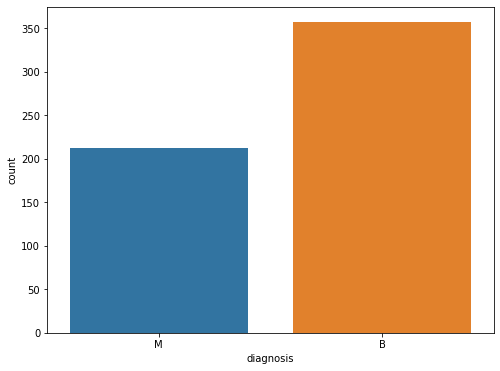

In [10]:
# Benign and Malignant count
print("Number of Benign {benign_count}\nMalignant count: {malignant_count}" 
.format(benign_count = labels_data.value_counts()[0], malignant_count = labels_data.value_counts()[1]))

plt.figure(figsize=(8,6))
labels_count = sns.countplot(labels_data, label="Count")

**Note:** We can see that the `dataset is imbalanced`, as the number of Benign samples is larger than the Malignant samples, so we `will need to balance the dataset`.

#### **3.1 Normalization**

* Normalization is a process where values are shifted and scaled between 0 and 1.
  
* Also called as *Min-Max Scaling*
  
* It is used to normalize the data so that the features have a similar scale.
  
$$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$ 

Where $X_{min}$ is the mean and $X_{max}$ are the minimum, and maximum values of the feature.

* Normalization is an optimal strategy when the dataset doesn't have a *Gaussian Distribution*. Useful for algorithms like K-NN *that do not assume any distribution.*

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Creating an Object of StandardScaler
scaler = MinMaxScaler()

# Fit the dataframe to the scaler
print(scaler.fit(features_data))

MinMaxScaler()


In [12]:
# Transform the dataframe
features_scaled = scaler.transform(features_data)

# Convertin the scaled array to dataframe
features_scaled = pd.DataFrame(features_scaled, columns=features_data.columns)

features_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


**Violin plot by group of 10 features** for observing the distribution of numeric data, useful for comparision of distributions between multiple groups 

**a. First 10 Features**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

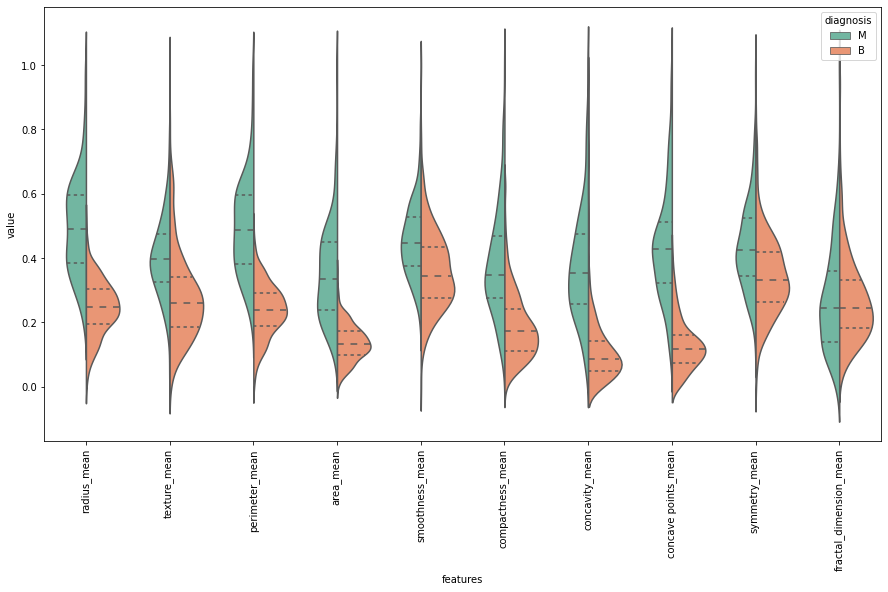

In [13]:
# First ten features
violin_data = pd.concat([features_scaled.iloc[:,0:10], labels_data], axis=1)

violin_data = pd.melt(violin_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))
sns.violinplot(data=violin_data, x="features", y="value" ,palette="Set2", hue="diagnosis", 
    split=True, inner="quart", scale="count")

plt.xticks(rotation=90)

From the above plot we can observe, that few features such as `radius_mean` and `texture_mean` have a similar distribution, where the median of Benign is separated from Malignant. Such features can be useful for classification.

Whereas, `fractal_dimension_mean` feature has almost similar median of Benign and Malignant, Thus it doesn't make sense to use this feature for classification.

**b. Second 10 Features**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

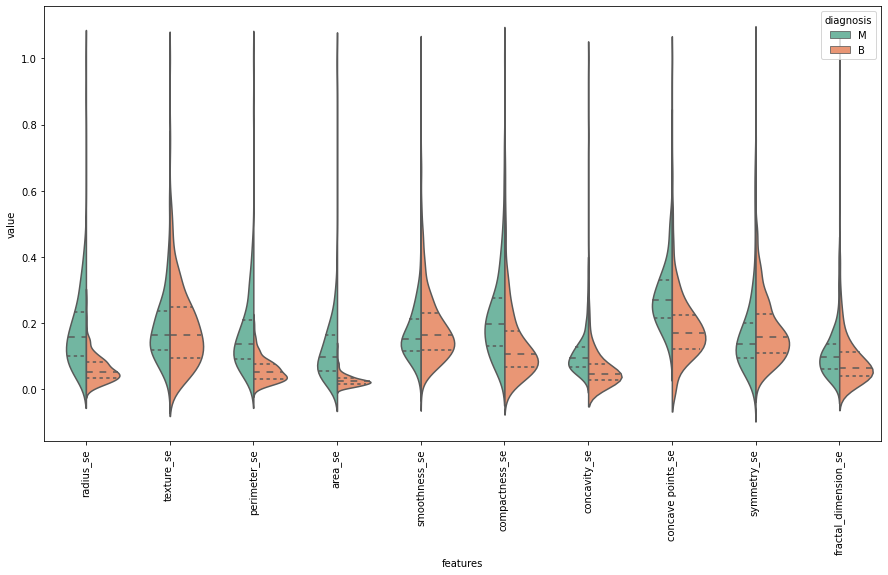

In [14]:
violin_data = pd.concat([features_scaled.iloc[:,10:20], labels_data], axis=1)

violin_data = pd.melt(violin_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))
sns.violinplot(data=violin_data, x="features", y="value" ,palette="Set2", hue="diagnosis", 
    split=True, inner="quart", scale="count")

plt.xticks(rotation=90)

**c. Rest of the Features**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

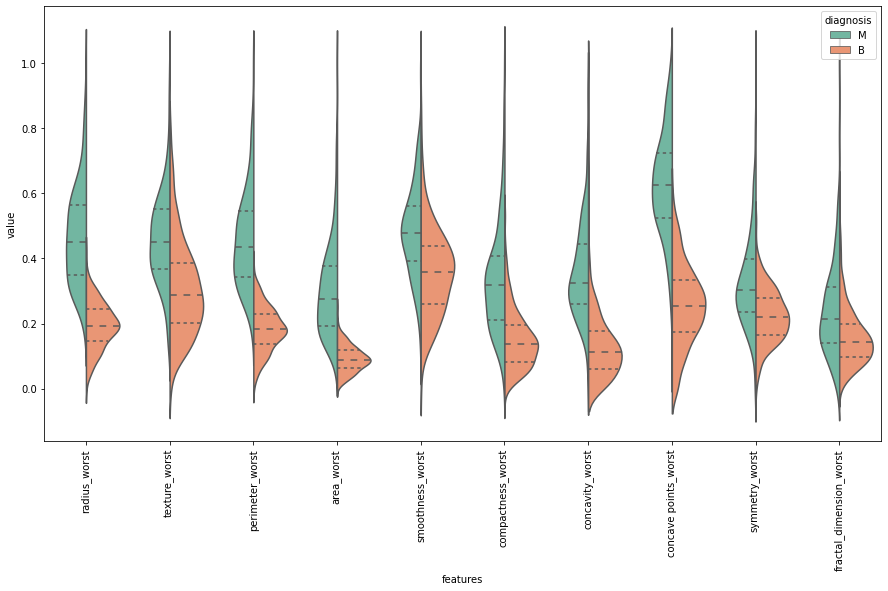

In [15]:
violin_data = pd.concat([features_scaled.iloc[:,20:31], labels_data], axis=1)

violin_data = pd.melt(violin_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))
sns.violinplot(data=violin_data, x="features", y="value" ,palette="Set2", hue="diagnosis", 
    split=True, inner="quart", scale="count")

plt.xticks(rotation=90)

**Note:** We can observe that the features `concavity_worst` and `concave point_worst` looks similar, but with better understanding of the distribution and if the features are *correlated* with each other one feature can be dropped. 

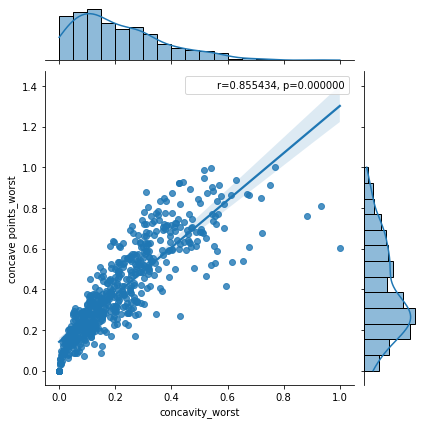

In [16]:
# Jointplot for the two features
graph = sns.jointplot(x="concavity_worst", y="concave points_worst", data=features_scaled, kind="reg")

r, p = stats.pearsonr(x=features_scaled['concavity_worst'], y=features_scaled['concave points_worst'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

From the above *Joint Plot* we can observe the data distribution of the above features are very similar, The `Pearsonr value` is *0.85*, which is very close to 1.0, thus we can drop the feature `concavity_worst` and `concave point_worst` from the dataset as they are *correlated with each other*.

`Pearson Correlation` measures the strength of linear relationship between two variables, values ranging between -1 and 1 where,
* -1 means two variables are negatively correlated
* 0 means the variables have no uncorrelation
* +1 means two variables are positively correlated

**Correlation between all features in the dataset**

<AxesSubplot:>

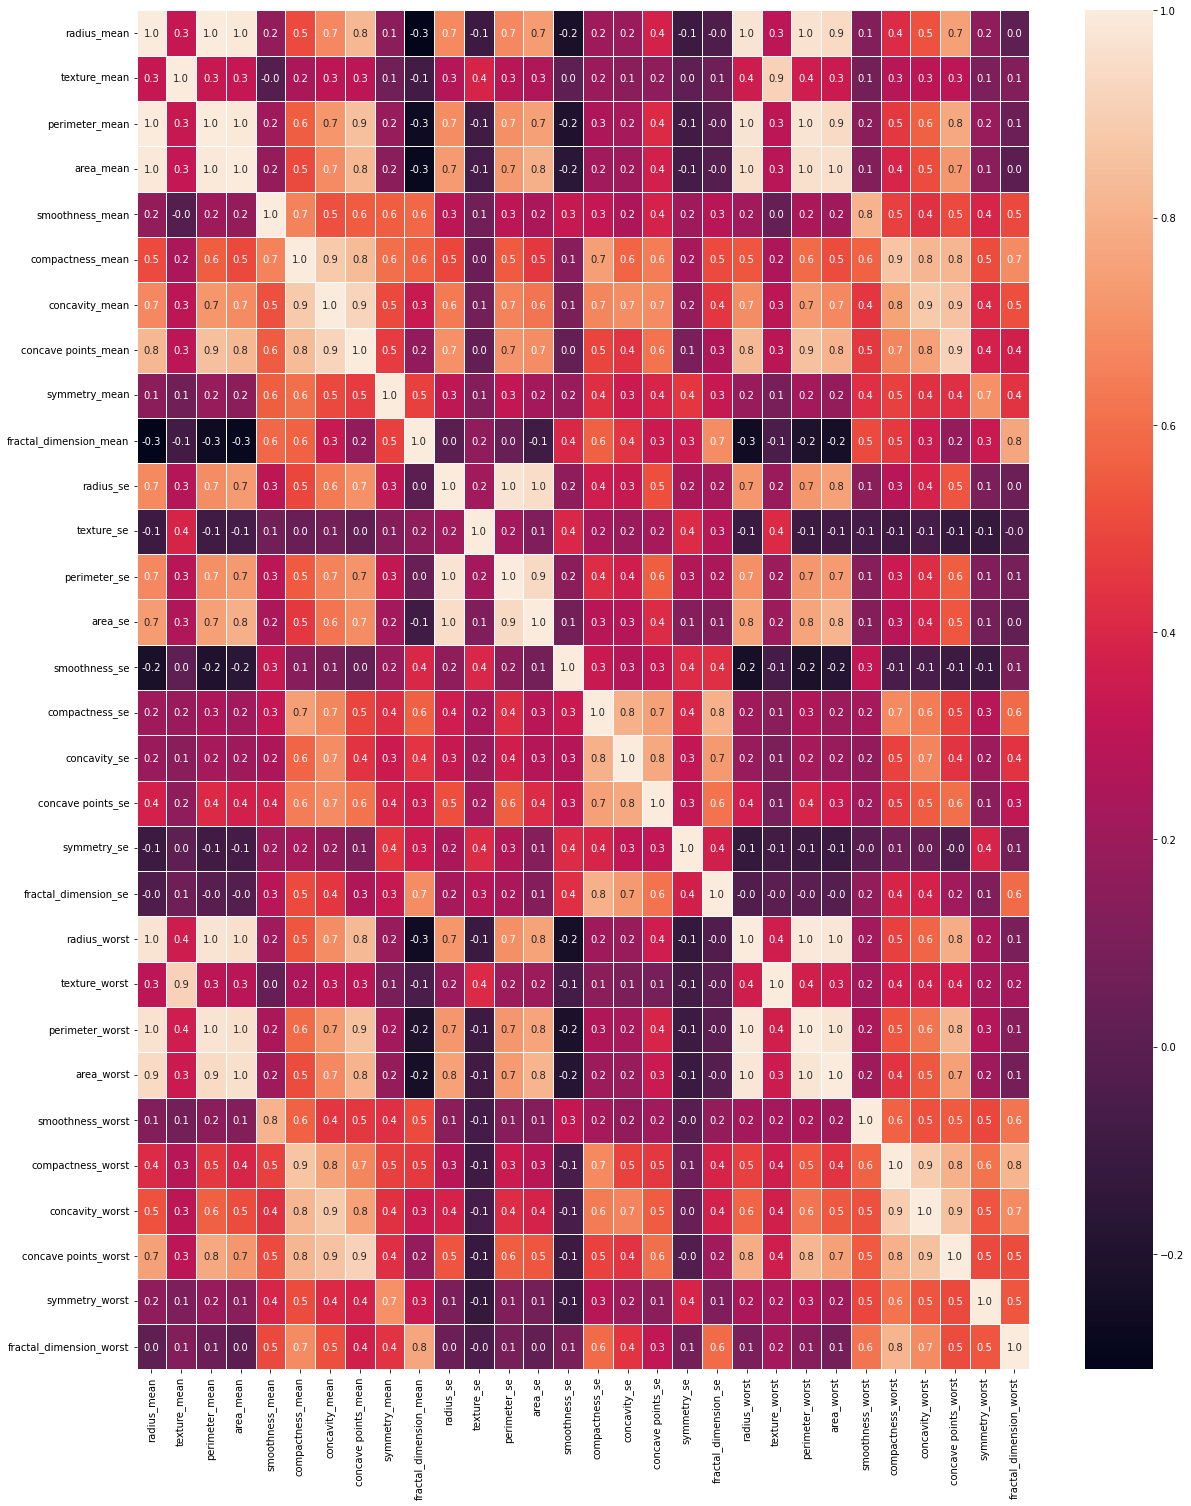

In [17]:
# Correlation by Heatmap
f,ax = plt.subplots(figsize=(20,25))
sns.heatmap(features_scaled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From the above *Correlation Heat Map*, we can see that the features radius_mean, perimeter_mean, area_mean are correlated with each other. 

Similarly, compactness_mean, concavity_mean, concave points_mean are correlated with each other.

<AxesSubplot:xlabel='features', ylabel='value'>

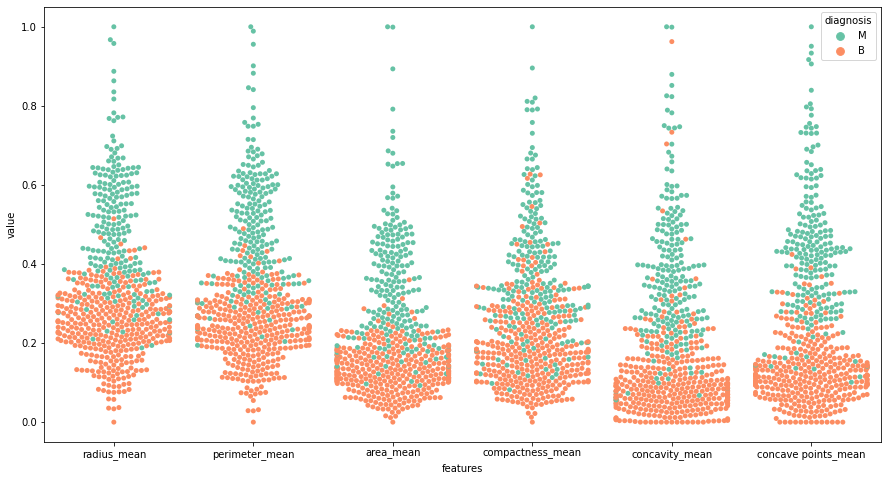

In [18]:
# Swarm Plots
swarm_data = pd.concat([features_scaled[["radius_mean","perimeter_mean","area_mean", 
    "compactness_mean", "concavity_mean", "concave points_mean"]], labels_data], axis=1)

swarm_data = pd.melt(swarm_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))

sns.swarmplot(data=swarm_data, x="features", y="value" ,palette="Set2", hue="diagnosis")

<AxesSubplot:xlabel='features', ylabel='value'>

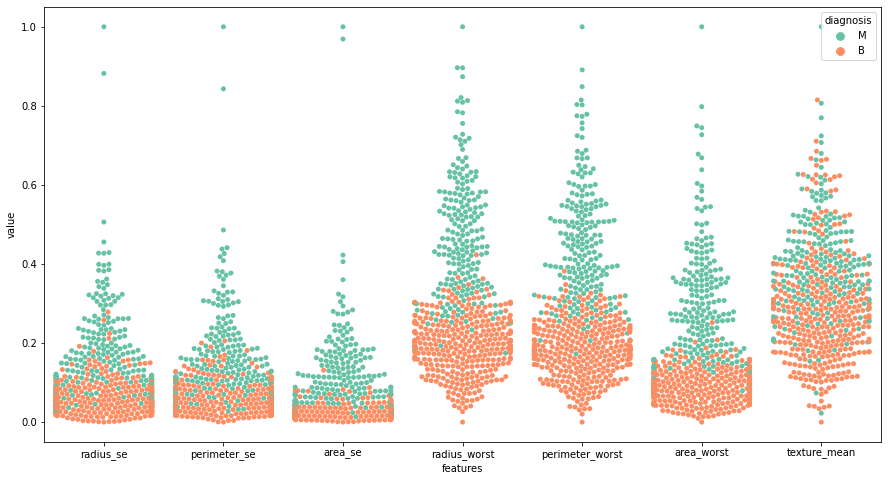

In [19]:
# Swarm Plots
swarm_data = pd.concat([features_scaled[["radius_se","perimeter_se","area_se", "radius_worst", 
    "perimeter_worst", "area_worst", 'texture_mean']], labels_data], axis=1)

swarm_data = pd.melt(swarm_data, id_vars="diagnosis" , var_name='features', value_name='value')

plt.figure(figsize=(15,8))

sns.swarmplot(data=swarm_data, x="features", y="value" ,palette="Set2", hue="diagnosis")

**Inference**
* From the above Heatmap, we can see that the features *radius_mean*, *perimeter_mean*, *area_mean* are *correlated* with each other, so we can use *area_mean*.
  
Similarly,
* *compactness_mean*, *concavity_mean*, *concave points_mean* are *correlated* with each other, so that we can use *concavity_mean*.

* *radius_se*, *perimeter_se* and *area_se* are correlated, thus dropping all features except *area_se*.

* *radius_worst*, *perimeter_worst*, *area_worst* and area_worst is taken for classification.
  
* I use *area_mean* with *texture_mean*, *area_worst*

**How am I choosing only selective features from other correlated features ?**
* From the above swarm plot the area_mean is distinct and widely distributed, features with similar nature of distribution will not be useful for classification.
* With this reasoning, we can make use of the essential features only.

#### **3.2 Why Feature Selection?**

* Feature Selection is a technique for selecting the most relevant features from a dataset.

* This process reduces the number of input variables and hence reduces the complexity of the model.

**Feature Selection for K-NN**
* Distance Algorithms such as the K-NN, K-means and SVM are much affected by the range of features in the dataset.

* These algorithms are based on distance metric, which uses the distance between data points to determine the similarity. Thus relevant features provide better accuracy.

In [20]:
# List of correlated features, planned to drop
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
    'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
    'compactness_se','concave points_se','texture_worst','area_worst']

# Updated scaled features dataset
features_updated = features_scaled.drop(drop_list,axis = 1)

features_updated.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.022658,0.363733,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.311645,0.183042,0.601136,0.568610,0.598462,0.418864
1,0.272574,0.501591,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.084539,0.091110,0.347553,0.192971,0.233590,0.222878
2,0.390260,0.449417,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.205690,0.127006,0.483590,0.359744,0.403706,0.213433
3,0.360839,0.102906,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.728148,0.287205,0.915472,0.548642,1.000000,0.773711
4,0.156578,0.489290,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.136179,0.145800,0.437364,0.319489,0.157500,0.142595


In [21]:
print("Shape after dropping correlated features",features_updated.shape)

Shape after dropping correlated features (569, 16)


**Note :** The updated features dataset is reduced to 16 features from 30. Considering only the essential features will help in improving the accuracy and reducing the complexity of the model.

#### **3.2.1 Is our Feature Selection right?**

* The selected features can be evaluated using a `RandomForestClassifier` and relevant evaluation metrics such as `Confusion Matrix, Accuracy Score` model. 
  
* But I am not quoting the working of the RandomForest model in this notebook, as this notebook is about K-NN Classifier, and my approach towards an efficient classification.

* In this notebook, I *have explained my detailed approach for an efficient classification using K-NN and validating its performance using relevant evaluation metrics*.

## **4. Training Pipeline**

The below section includes:
1. Train-Test Split
   
2. K-NN Classifier
   
3. Evaluation Metrics

4. Fine-tuning K-NN Model - Hyperparameter Optimization

#### **4.1 Train-Test Split**

* Split the dataset into training and testing sets using `train_test_split` from `sklearn.model_selection` module.

* In this case, the `test size is set to 0.35`, which means 35% of the dataset will be used for testing the model performance.

In [22]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, test_size=0.35, random_state=42)

#### **4.2 K-NN Classifier**

* K-NN Classifier is a classification algorithm that uses `the distance between` the training data points and the test data points to determine the most similar data points.

* By default K-NN uses the `EUCIidean Distance` as the distance metric.


**EUCIidean Distance**

* The eUCIidean distance between two points is measured by the below formula:

    $$d(x,y) = \sqrt{\sum_{i=1}^{n}(y_{i}-x_{i})^2}$$

<img src="https://cdn-images-1.medium.com/max/800/1*ZrwEraj9S-u_KOWdKWc8sQ.png" width="720" height="650" style="margin-left:auto; margin-right:auto"/>

**Hyperparameter in K-NN**

* Hyperparameters are the `adjustable parameters` that can be tuned to improve the performance of the model.

* Hyperparameter to consider in K-NN are the `number of neighbors`, `weights`, and the `distance metric`. Most common and simple tunable parameter is the `number of neighbors`.

* The `n_neighbors` parameter is set to 5, which is the *default value*.

* In this project, I have optimized the K-NN Model on `number of neighbors`, `weights`, and the `distance metric` using GridSearchCV from `sklearn.model_selection` module, discussed in the upcoming sections.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

## KNN Classifier with K=5 (Initial)
knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

#### **4.3 Evaluation Metrics**

The Evaluation Metrics are imported from `sklearn.metrics` module.

* **Classification Report:** Used to evaluate the quality of predictions by classifier. The report shows the main classification metrics such as precision, recall, f1-score per class or label basis.

  * *Precision*: The proportion of the predicted classes that are correct.
  * *Recall*: The proportion of the actual classes that are correctly predicted.
  * *F1-score*: The harmonic mean of precision and recall.
  

* **Confusion Matrix:** *N x N* matrix for evaluating the classification model. Compares actual target values to predicted target values.
  * *True Positives:* The number of correct predictions in the actual class.
  * *True Negatives:* The number of correct predictions in the actual class.
  * *False Positives:* The number of incorrect predictions in the actual class.
  * *False Negatives:* The number of incorrect predictions in the actual class.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/confusion-matrix.JPG" width="330" height="230" style="margin-left:auto; margin-right:auto"/>

* **Accuracy Score:** Takes true values and predicted values as input and returns the accuracy of the model.

* **Cross Val Score:** Taking inputs as dataset and cross validation configuration and returns a list of accuracy for each fold.
  * Each Fold is a training and testing set.

<img src="https://www.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1630394319812.jpg" width="700" height="430" style="margin-left:auto; margin-right:auto;">

In [24]:
# Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# Accuracy Score
from sklearn.metrics import accuracy_score

# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [25]:
# Classification Report and Confusion Matrix
print("Classification Report\n",classification_report(y_test, pred), 
"\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

Classification Report
               precision    recall  f1-score   support

           B       0.95      0.95      0.95       129
           M       0.92      0.92      0.92        71

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200
 

Confusion Matrix
 [[123   6]
 [  6  65]]


In [26]:
# Accuracy Score for whole of Test Data
print("Accuracy Score",accuracy_score(y_test, pred))

Accuracy Score 0.94


In [27]:
# Accuracy score for a cross validation split of 5
print(cross_val_score(knn, X_train, y_train, cv=5))

[0.98648649 0.93243243 0.94594595 0.94594595 0.95890411]


#### **Explore how the performance of your model varies on both the train and the validation data change as you vary the amount of training data used ?**

Simple experiment by `changing the amount of train and test data` and see how the model performs for `default neighbors of 5`.

* Experiment 1 - Train data 67% and Test data 33%
  
* Experiment 2 - Train data 80% and Test data 20%
  
* Experiment 3 - Train data 50% and Test data 50%


**Experiment 1 - Train data 67% and Test data 33%**

In [28]:
# Train data 67% and Test data 33%
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, 
train_size=0.67, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

print("Experiment 1 - Train data 0.67 and Test data 0.33\n\nClassification Report\n",
    classification_report(y_test, pred), "\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

print("\nAccuracy Score",accuracy_score(y_test, pred))

Experiment 1 - Train data 0.67 and Test data 0.33

Classification Report
               precision    recall  f1-score   support

           B       0.95      0.95      0.95       121
           M       0.91      0.91      0.91        67

    accuracy                           0.94       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188
 

Confusion Matrix
 [[115   6]
 [  6  61]]

Accuracy Score 0.9361702127659575


**Experiment 2 - Train data 80% and Test data 20%**

In [29]:
# Train data 80% and Test data 20%
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.80, 
    random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

print("Experiment 1 - Train data 0.80 and Test data 0.20\n\nClassification Report\n",
    classification_report(y_test, pred), "\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

print("\nAccuracy Score",accuracy_score(y_test, pred))

Experiment 1 - Train data 0.80 and Test data 0.20

Classification Report
               precision    recall  f1-score   support

           B       0.94      0.94      0.94        71
           M       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114
 

Confusion Matrix
 [[67  4]
 [ 4 39]]

Accuracy Score 0.9298245614035088


**Experiment 3 - Train data 50% and Test data 50%**

In [30]:
# Train data 50% and Test data 50%
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.50, 
    random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

print("Experiment 1 - Train data 0.80 and Test data 0.20\n\nClassification Report\n",
    classification_report(y_test, pred), "\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

print("\nAccuracy Score",accuracy_score(y_test, pred))

Experiment 1 - Train data 0.80 and Test data 0.20

Classification Report
               precision    recall  f1-score   support

           B       0.96      0.96      0.96       187
           M       0.93      0.92      0.92        98

    accuracy                           0.95       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285
 

Confusion Matrix
 [[180   7]
 [  8  90]]

Accuracy Score 0.9473684210526315


**Inference**

For a *fixed value of 5 neighbors*, the results of the above experiments are as follows:

| Experiment| Train Data | Test Data | Accuracy Score |
| --- | --- | --- | --- |
| 1 | 67 | 33 | 0.936 |
| 2 | 80 | 20 | 0.929 |
| 3 | 50 | 50 | 0.947 |

* From the above observation we can see that the `accuracy score varies` as the *train data* and *test data* are varied.

* Ideally, `slightly larger proportion` of *train data* will help the algorithm to learn better. And a small proportion of *test data* will help the algorithm to evaluate the model.
  
**How to configure Train-Test Split ?**

* There is no optimal configuration train-test split percentage of the dataset
  
* The data split depeneds on several factors such as:
  * Computation cost in training and evaluating the model
  
  * Classes in the train and test dataset

**So What is a Good Validation Strategy..**

* In this experiment of breast cancer classification, the `dataset is imbalanced`. That is, number of benign samples is much more than the number of malignant samples.
  
  * Count of Benign: 357 and Malignant: 212 [Bar Plot Section 3]

* When data is split, there are possibilities *specific type of data point may go into either training or testing dataset*. This leads to problems such as `Overfitting` and `Underfitting`.

* Thus we need to balance the dataset. Splitting the dataset such that an `equal proportion` of benign and malignant samples are maintained. 

* This task can be carried using a `Stratified Train-Test Split` method, where the proportions of both labels are equally maintained in train and test split.

**Stratified Train-Test Split**

In [31]:
# Train data 67% with Stratified Split
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.67, 
    random_state=42, stratify=labels_data)

knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

print("Stratified Train-Test Split\n\nClassification Report\n",classification_report(y_test, pred), 
    "\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

print("\nAccuracy Score",accuracy_score(y_test, pred))

Stratified Train-Test Split

Classification Report
               precision    recall  f1-score   support

           B       0.95      0.99      0.97       118
           M       0.98      0.91      0.95        70

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188
 

Confusion Matrix
 [[117   1]
 [  6  64]]

Accuracy Score 0.9627659574468085


**Note:** From the above observation, we can see that `stratified split` of the dataset has improved the accuracy of the classification model. 

* As *Stratified Split* provides the model with an opportunity for a better understanding of the dataset, as each fold conttained a `balanced proportion of labels` for train data.

#### **4.4 Finetuning the K-NN model - Hyperparameter Optimization**

* Hyperparamerter tuning is a process of tuning the hyperparameters of a model to obtain the best possible performance.
  
* Optimal values for hyperparameters `reduced` the `noise on classification` and `overfitting` of the model.

* In this project the Hyperparameter Optimization is done using two techniques:
  
  * Grid Search
  
  * Elbow Method

#### **A. Elbow Method**

* In *Elbow Method* the optimal value of n_neighbors is found by `varying the number of clusters` from a range of values.
  
* Calculating `Within-Cluster Sum of Squares (WCSS)` for each value of n_neighbors or K.

* The `sum of squared distance` (WCSS) between the centroid of a cluster and each point in the cluster. With a plot, we can observer the curve dips after certain value, creating an elbow in the plot.

* The value corresponding to this dip is the optimal value of K.

**Accuracy Rate vs N_Neighbors**

In [32]:
accuracy_rate = []

# Range of n_neighbors for KNN
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_rate.append(scores.mean())

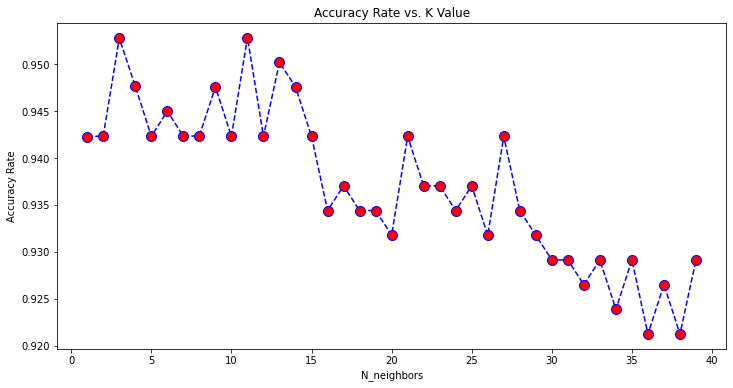

In [33]:
plt.figure(figsize=(12,6))

accuracy_plot = plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

accuracy_plot = plt.title('Accuracy Rate vs. K Value')

accuracy_plot = plt.xlabel('N_neighbors')

accuracy_plot = plt.ylabel('Accuracy Rate')

From the above plot its evident that `Accuracy Rate` is  `decreasing` for higher values of n_neighbors. The *optimal value* for n_neighbors from the above plot is *11*.

**Error Rate vs N_Neighbors**

In [34]:
error_rate = []

# Range of n_neighbors for KNN
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    error_rate.append(1 - scores.mean())

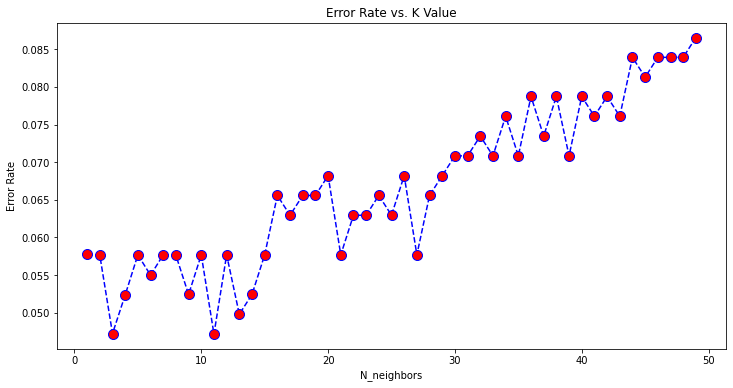

In [35]:
plt.figure(figsize=(12,6))

error_rate_plot = plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

error_rate_plot = plt.title('Error Rate vs. K Value')

error_rate_plot = plt.xlabel('N_neighbors')

error_rate_plot = plt.ylabel('Error Rate')

From the above plot its evident that `Error Rate` is  `increasing` for higher values of n_neighbors. The *optimal value* for n_neighbors from the above plot is *11*.


**Classification Report of KNN Model for n_neighbors = 11**

In [36]:
# Train data 67% with Stratified Split
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.67, 
    random_state=42, stratify=labels_data)

knn = KNeighborsClassifier(n_neighbors=11)

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

print("Stratified Train-Test Split\n\nClassification Report\n",classification_report(y_test, pred), 
    "\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

print("\nAccuracy Score",accuracy_score(y_test, pred))

Stratified Train-Test Split

Classification Report
               precision    recall  f1-score   support

           B       0.95      0.99      0.97       118
           M       0.98      0.91      0.95        70

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188
 

Confusion Matrix
 [[117   1]
 [  6  64]]

Accuracy Score 0.9627659574468085


#### **B. Grid Search**

* Loops through a predefined hyperparameter grid and returns the best model based on the validation data.

* In this technique, the hyperparameters are `divided into discrete grid points` and the model is trained on each grid point. And evaluated on performance metrics.

**Note:** Unlike *Elbow Method*, *Grid Search* can be used to find optimal values of several hyperparameters, `not just limited to value of n_neighbors`.

In [37]:
# Grid Search from Model Selection Library
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 
                70, 75, 80, 85, 90, 95, 100],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','eUCIidean','manhattan']}

# Grid Search on KNN for 10-fold cross validation
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

Fitting 10 folds for each of 138 candidates, totalling 1380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.8s
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 336, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'eUCIidean' not valid. Use sorted(skl

In [38]:
g_res.best_score_

0.958029689608637

In [39]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [40]:
# Train data 67% with Stratified Split
X_train, X_test, y_train, y_test = train_test_split(features_updated, labels_data, train_size=0.67, 
    random_state=42, stratify=labels_data)

knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='manhattan')

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

print("Stratified Train-Test Split\n\nClassification Report\n",classification_report(y_test, pred), 
    "\n\nConfusion Matrix\n",confusion_matrix(y_test, pred))

print("\nAccuracy Score",accuracy_score(y_test, pred))

Stratified Train-Test Split

Classification Report
               precision    recall  f1-score   support

           B       0.94      1.00      0.97       118
           M       1.00      0.90      0.95        70

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188
 

Confusion Matrix
 [[118   0]
 [  7  63]]

Accuracy Score 0.9627659574468085


## **Decision Boundary for the K-NN Model**

* Functioning of K-NN model depends on the local geometry of the data distribution on a feature hyperplane.

* The line - decision boundary separates the classes in the dataset. Thus it is not smooth and is non-linear.

The below is a plot of the decision boundary for the K-NN model used in this project. The decision boundary is visualized using the `plot_decision_boundary` function from the `mlxtend` module.

* The required inputs for plotting decision boundary is `array` datatype. Thus `lambda` is used to convert the `Categorical data of labels` to binaries.

* Then converted to array datatype using `np.asarray` function.

```python
key = {'B':0, 'M':1} # Benign as 0 and Malignant as 1

y = list(map(lambda i : d[i], y)) # Convert Categorical data of labels to binaries

np.array(y) # Convert to array datatype
```

<AxesSubplot:>

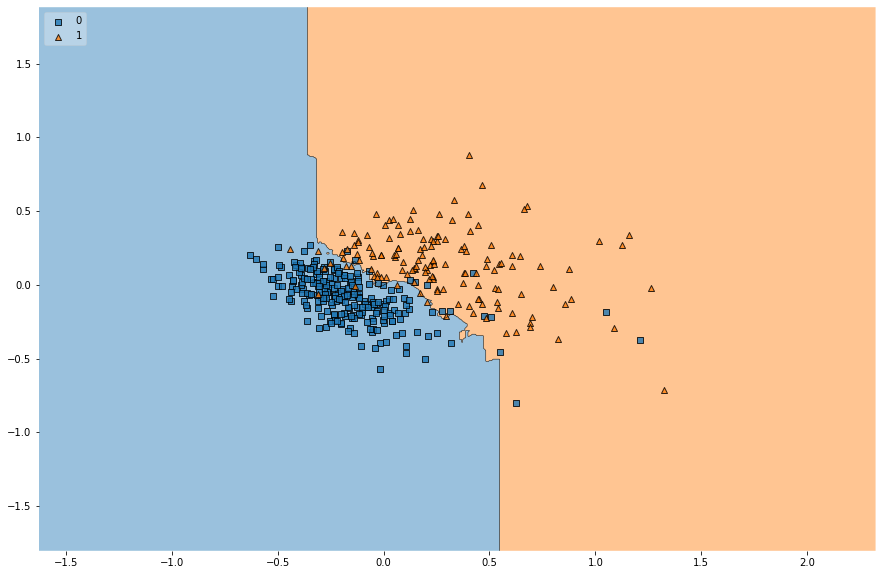

In [41]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


pca = PCA(n_components = 2)

# X and Y values as inputs of array datatype
X_train2 = pca.fit_transform(X_train)
y =  np.array(y_train)
d = {'B':0, 'M':1}
y = list(map(lambda i : d[i], y))
labels_encoded = np.array(y)

# Plotting the decision regions
plt.figure(figsize=(15,10))
knn.fit(X_train2, labels_encoded)
plot_decision_regions(X_train2, labels_encoded, clf=knn, legend=2)

## **Conclusion**

* For the `Example Task 2` of Section C in the Summative Assessment for Statistical Computing and Empirical Methods, I have successfully implemented the `K-NN based classification for breast cancer`.

* The Wisonsin Breast Cancer dataset is an `Imbalanced Dataset` with 357 Benign samples and 212 Malignant samples.

* Detailed Data exploration and visualization is done for `Feature Selection`, as the dataset has several *correlated features*.

* Experiments based on `varying sample size` is conducted to observe the variation in performance of the Classifier. 
  
* `Stratified` Data Split is optimal for such imbalanced dataset as it *avoids the problems* of `Overfitting` and `Underfitting`, by ensuring that the `proportion of labels` in each fold is equal. This improved the model accuracy from 0.95 to 0.95

* `Hyperparameter Optimization` is done using *Grid Search* and the traditional *Elbow Method* technique for comparison. Unlike the Elbow method, `Grid Search` can be used to find optimal values of several hyperparameters, `not just limited to value of n_neighbors`.

* Relevant `Evaluation Metrics` such as Confusion Matrix, Classification Report, Precision, Recall, F1-Score are calculated for the K-NN model.

* The `Decision Boundary` for the K-NN model is visualized to understand the clustering algorithm better.